# Parte 2

## Análise inicial e Tratamento dos dados

Primeiramente, realizamos uma análise primária no dataset escolhido para a parte 2 utilizando a biblioteca `pandas` para reconhecer nossos `atributos` e `classes`. Através da função `describe` evidenciamos as estatísticas e vemos alguns valores inconsistentes que posteriormente são tratados para não afetar negativamente nosso modelo com dados incongruentes. Exemplo: idade negativa

In [29]:
import pandas as pd

import plotly.express  as px

base_credit = pd.read_csv("datasets/credit_data.csv")
base_credit.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


Nos trecho abaixo, apagamos somente os dados incorretos e preenchemos as lacunas com a média do resto dos dados. Fizemos o mesmo para linhas com dados faltantes.

In [14]:
base_credit3 = base_credit.drop(base_credit[base_credit['age']< 0].index) # outro método é preencher-los manualmente


,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [15]:
print(base_credit['age'].mean()) # Média com os valores inconsistentes

base_credit3['age'].mean() # Média com valores inconsistentes removidos  

40.80755937840458


40.92770044906149

In [16]:
base_credit.loc[base_credit['age'] < 0, 'age'] = 40.92 # Preenchimento dos valores inconsistentes com a média


In [19]:
base_credit.isnull().sum()

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64

In [20]:
base_credit.loc[pd.isnull(base_credit['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [21]:
base_credit['age'].fillna(base_credit['age'].mean(), inplace = True)

## Divisão entre Previsores e Classes

In [24]:
X_credit = base_credit.iloc[:, 1:4].values
X_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [25]:
X_credit.shape

(2000, 3)

In [26]:
y_credit = base_credit.iloc[:, 4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0])

## Padronizaçao

In [27]:
from sklearn.preprocessing import StandardScaler
scaler_credit = StandardScaler()
X_credit = scaler_credit.fit_transform(X_credit)
X_credit

array([[ 1.45393393,  1.36538093,  1.20281942],
       [-0.76217555,  0.5426602 ,  0.69642695],
       [ 0.83682073,  1.67417189,  1.17471147],
       ...,
       [-0.07122592, -0.97448519,  0.35420081],
       [-0.11000289,  1.73936739, -0.92675625],
       [ 1.682986  ,  1.14917639,  0.96381038]])

Neste trecho de código, estão sendo realizadas algumas etapas de pré-processamento de dados usando a biblioteca `scikit-learn` em Python. Vamos analisar linha por linha:

1. `from sklearn.preprocessing import StandardScaler`: Aqui, estamos importando a classe `StandardScaler` do módulo `preprocessing` da biblioteca `scikit-learn`. O `StandardScaler` é um objeto que será usado para padronizar os dados.

2. `scaler_credit = StandardScaler()`: Aqui, estamos criando uma instância do objeto `StandardScaler` e atribuindo-a à variável `scaler_credit`. Essa instância será usada para padronizar os dados.

3. `X_credit = scaler_credit.fit_transform(X_credit)`: Aqui, estamos aplicando a transformação de padronização aos dados contidos na variável `X_credit`. A função `fit_transform()` do objeto `StandardScaler` ajusta o scaler aos dados e, em seguida, aplica a transformação aos dados. Os dados padronizados são armazenados na variável `X_credit`.

4. `X_credit`: Por fim, estamos exibindo os dados padronizados na saída. A variável `X_credit` contém os dados após a transformação de padronização.

Essas etapas de pré-processamento são comumente usadas para normalizar os dados, garantindo que eles estejam na mesma escala antes de serem usados em algoritmos de aprendizado de máquina. A padronização é uma técnica que transforma os dados de forma que eles tenham média zero e desvio padrão igual a um. Isso pode ser útil para algoritmos que assumem que os dados estão normalmente distribuídos e têm a mesma escala.

## Divisão entre treinamento e teste

In [28]:
from sklearn.model_selection import train_test_split

X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = train_test_split(X_credit, y_credit, test_size = 0.25, random_state=0)
X_credit_treinamento.shape

(1500, 3)

## Pickling/Serialização

In [28]:
import pickle
with open('credit.pkl', mode='wb') as f:
    pickle.dump([X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste], f)
with open('credit.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

## Instanciando modelo NB

In [30]:
from sklearn.naive_bayes import GaussianNB

naive_credit_data = GaussianNB() # Cria uma instância do classificador Naive Bayes com a distribuição Gaussiana (GaussianNB)
naive_credit_data.fit(X_credit_treinamento, y_credit_treinamento) # Treina o modelo Naive Bayes com os dados de treinamento padronizados e seus rótulos

GaussianNB()

In [31]:
predict = naive_credit_data.predict(X_credit_teste) # Faz previsões usando o modelo Naive Bayes treinado nos dados de teste e armazena na variavel predict
predict

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_credit_teste, predict) 

0.938

In [33]:
confusion_matrix(y_credit_teste, predict)

array([[428,   8],
       [ 23,  41]])

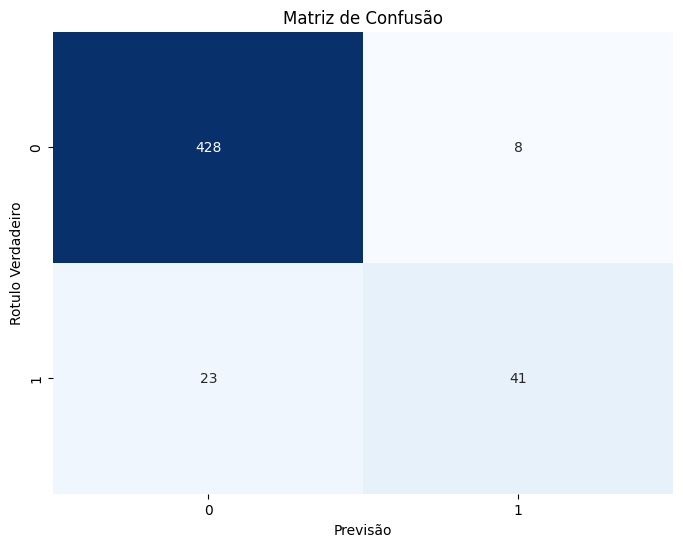

In [34]:
y_true = y_credit_teste  # Rótulos verdadeiros
y_pred = predict  # Previsões do modelo

# Calcula a matriz de confusão
cm = confusion_matrix(y_true, y_pred)

# Plota a matriz de confusão como um mapa de calor (heatmap)
plt.figure(figsize=(8, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Previsão')
plt.ylabel('Rotulo Verdadeiro')
plt.title('Matriz de Confusão')
plt.show()

In [35]:
from sklearn.metrics import accuracy_score, classification_report

print(classification_report(y_credit_teste, predict))


              precision    recall  f1-score   support

           0       0.95      0.98      0.97       436
           1       0.84      0.64      0.73        64

    accuracy                           0.94       500
   macro avg       0.89      0.81      0.85       500
weighted avg       0.93      0.94      0.93       500

